When running the cells with sympy-output you may experience a pop-up window saying something like "Would you allow the app to make changes on your computer (MikTeX Package Manager)" (At least we do). It seems like the code runs regardless of your answer to this.

# Principal-Agent Model Introduction

The principal-agent model considers one principal, P, and one agent, A, and their interaction. We can think of it as an employer and a employee in a firm. The agent chooses an effort level, $e \geq 0 $, which is costly for him according to the following cost function:
\\[
\begin{eqnarray*}
C(e) & = & \frac{1}{2}ce^2, \quad c>0
\end{eqnarray*}\\]

The output, $y$, produced by the agent is the sum of the agent's effort and an exogenous noise term $\epsilon$:
\\[
\begin{eqnarray*}
y & = & e+\epsilon, \quad  \epsilon \sim N(0,\sigma^2)
\end{eqnarray*}\\]

P can observe $y$ but neither $e$ or $\epsilon$. We assume that P offers A a linear contract consisting of a salary, $s$, and a performance-contigent component, $by$. $b$ is a commission rate paid to A. So A's wage payment is equal to (if he accepts the contract):
\\[
\begin{eqnarray*}
w & = & s+by
\end{eqnarray*}\\]
If A doesn't accept the contract he gets $\underline{u}$=0.

A is risk neutral and wants to maximize the following utility function:
\\[
\begin{eqnarray*}
u(w,e) & = & E(w)-C(e)=s+be-\frac{1}{2}ce^2
\end{eqnarray*}\\]

P is also risk neutral and maximizes the expected payoff under the constraints that insures (IC) A chooses the contract that is meant for him and (PC) A accepts the contract relative to the outside option:
\\[
\begin{eqnarray*}
E(\pi) & = & E(y-w)=e-s-be
\end{eqnarray*}\\]
\\[
\begin{eqnarray*}
s.t. 
\end{eqnarray*}\\]
\\[
\begin{eqnarray*}
(IC) \quad e & = & e^*
\end{eqnarray*}\\]
\\[
\begin{eqnarray*}
(PC) \quad u(w,e) & \geq & \underline{u}
\end{eqnarray*}\\]

The timing of events is as follows:
* P chooses the parameters of the contract $(s, b)$ and makes a contract offer to A
* A accepts or rejects the contract
* If A accepts the contract, he determines his level of effort
* The noise term is realized and both players receive their payoff

In [1]:
# import relevant packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from fractions import Fraction
import sympy as sm 
sm.init_printing(use_unicode=True) # for pretty printing

# The Algorithm

**Problem:** Find the optimal contract that P can offer A to incentivize A to maximize P's objective function.

**Inputs:** The two maximization problems from the model described above.
    
**Outputs:** $b^*$, $s^*$, $e^*$.

**Algorithm:** `solve_pa_model()`

Use rationality to solve the model by backwards induction as the agents can foresee the rational actions. 
  1. Optimize A's unconstrained utility problem: 
      * a. Differentiate and set equal to 0
      * b. Isolate e
  2. Consider P's constrained maximization problem:
      * a. Substitute one contraint into the other constraint
      * b. Substitute the combined constraint into the objective
      * c. Differentiate the unconstrained problem and set equal to 0
      * d. Isolate b
  3. Find the optimal contract: solve the system of equations to get $b^*$, $s^*$, $e^*$ 
      

# Solve with algebra

In [2]:
# define all symbols
c = sm.symbols('c', positive = True)
e = sm.symbols('e')
y = sm.symbols('y')
w = sm.symbols('w')
b = sm.symbols('b')
s = sm.symbols('s')

**Step 1** Consider A's unconstrained utility problem: 

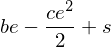

In [3]:
u = s + b*e - Fraction(1,2)*c*e**2
u

**Step 1.a** Differentiate and set equal to 0

In [4]:
A_foc = sm.diff(u, e) 
A_foc

**Step 1.b** Isolate e 

In [5]:
e_star = sm.solve(A_foc, e)
e_star

**Step 2.a** Consider P's constrained maximization problem: Substitute one contraint into the other constraint

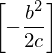

In [6]:
PC = s + b*e - Fraction(1,2)*c*e**2

# substituting (IC) into (PC)
PC_e_star = PC.subs(e, e_star[0]) 

# isolate s in the combined constraint (we use this later on)
s_star = sm.solve(PC_e_star, s)
s_star

**Step 2.b** Substitute the combined contraint into the objective

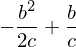

In [7]:
# profits (P's objective)
pi = e - s - b*e

# substituting the combined constraint into profits 
pi_uncon = pi.subs({s:s_star[0], e:e_star[0]}) 
pi_uncon

**Step 2.c** Differentiate the unconstrained problem and set equal to 0

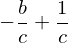

In [8]:
#solve the unconstrained problem
P_foc = sm.diff(pi_uncon, b) 
P_foc

**Step 2.d** Isolate b

In [9]:
b_star = sm.solve(P_foc, b)
b_star

**Step 3** Find the optimal contract: solve the system of equations to get $b^*$, $s^*$, $e^*$ 

In [10]:
e_star = e_star[0].subs(b, b_star[0])
e_star

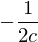

In [11]:
s_star = s_star[0].subs(b, b_star[0])
s_star

From this we see that it is optimal for the principal to "sell" the firm to the agent with the negative fixed salary, $s^*$. The agents then gets a commission rate, $b$, equal to 1 which means that the agent gets all the provenue of production. This is optimal as it incentives the agent to excert effort.

# Graphical Representation

In this section we will present the results of the model for different values of c.

In [12]:
c_vec = [0.5, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

# a. create list for each variable
e_func = []
s_func = []
b_func = []
u_func = []
pi_func = []

# b. fill in the the list with the functions found in section 3
for i in range(len(c_vec)):
    
    # i. optimal contract
    e_func.append(1/c_vec[i])
    s_func.append(-1/(2*c_vec[i]))
    b_func.append(1)
    
    # ii. utility and profit
    u_func.append(s_func[i] + b_func[i]*e_func[i] - 1/2*c_vec[i]*e_func[i]**2)
    pi_func.append(e_func[i] - s_func[i] - b_func[i]*e_func[i])

# c. print some of the results    
print(f'e_star for different values of c: {e_func[:3]}')
print(f's_star for different values of c: {s_func[:3]}')
print(f'b_star for different values of c: {b_func[:3]}')
print(f'u for different values of c: {u_func[:3]}')
print(f'pi for different values of c: {pi_func[:3]}')

e_star for different values of c: [2.0, 1.0, 0.5]
s_star for different values of c: [-1.0, -0.5, -0.25]
b_star for different values of c: [1, 1, 1]
u for different values of c: [0.0, 0.0, 0.0]
pi for different values of c: [1.0, 0.5, 0.25]


<Figure size 432x288 with 0 Axes>

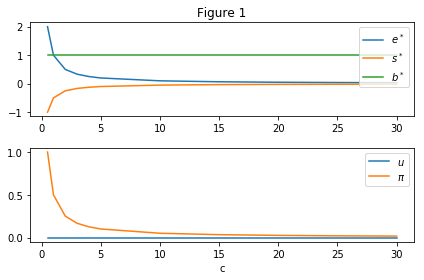

In [13]:
# a. create plots
fig = plt.figure() 
fig, ax = plt.subplots(2, 1)

# b. upper figure with contract variables
ax[0].plot(c_vec, e_func, label = '$e^*$')
ax[0].plot(c_vec, s_func, label = '$s^*$')
ax[0].plot(c_vec, b_func, label = '$b^*$')
ax[0].legend(loc = 'upper right')
ax[0].set_title('Figure 1')

# c. lower figure with utility and profits
ax[1].plot(c_vec, u_func, label = '$u$')
ax[1].plot(c_vec, pi_func, label = '$\pi$')
ax[1].legend(loc = 'upper right')
ax[1].set_xlabel('c')

# d. show
fig.tight_layout()
plt.show()

From figure 1 we see that the commission rate is 1 independent of c. The effort and salary are perfectly negatively correlated.
Futhermore it is seen from the lower graph that the agent always get a utility equal to his outside option = 0. The profit of P is decreasing in c as P needs to require a lower payment (the negative salary) from A to compensate A for the higher costs


# Extension of the Model

As an extension of the model we will look at a risk-averse agent. This means that the agent now maximizes the following utility function:
\\[
\begin{eqnarray*}
u(w,e) & = & E(w)- \frac{1}{2}rVar(w) - C(e)=s+be-\frac{1}{2}rb^2\sigma^2-\frac{1}{2}ce^2, \quad r,\sigma>0
\end{eqnarray*}\\]

**Step 1** Consider A's unconstrained utility problem: 

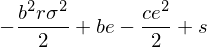

In [14]:
# add the new symbols
sigma = sm.symbols('sigma^2', positive = True)
r = sm.symbols('r', positive = True)

# agent's objective: maximize utility (unconstrained problem)
u_new = s + b*e - Fraction(1,2)*r*b**2*sigma - Fraction(1,2)*c*e**2
u_new 

**Step 1.a-b** Differentiate, set equal to 0 and isolate e

In [15]:
# 1.a
A_foc_new = sm.diff(u_new, e) 

# 1.b
e_star_new = sm.solve(A_foc_new, e)
e_star_new

This is exactly the same as we found in the basic model, so we can conclude that the extension has no effect on A's maximization problem.

**Step 2.a** Consider P's constrained maximization problem: Substitute one contraint into the other constraint

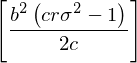

In [16]:
PC_new = s + b*e -  Fraction(1,2)*r*b**2*sigma - Fraction(1,2)*c*e**2

# substitute (IC) into (PC)
PC_e_star_new = PC_new.subs(e, e_star_new[0]) 
s_star_new = sm.solve(PC_e_star_new, s)
s_star_new

**Step 2.b-d** Substitute the combined contraint into the objective, differentiate and set equal to zero and isolate b.

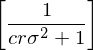

In [17]:
# 2.b substituting PC into profits 
pi_uncon_new = pi.subs({s:s_star_new[0], e:e_star_new[0]}) 

# 2.c solve the unconstrained problem
P_foc_new = sm.diff(pi_uncon_new, b) 

# 2.d find the optimal contract
b_star_new = sm.solve(P_foc_new, b)
b_star_new

**Step 3** Find the optimal contract: solve the system of equations to get $b^*$, $s^*$, $e^*$ 

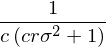

In [18]:
e_star_new = e_star_new[0].subs(b, b_star_new[0])
e_star_new

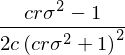

In [19]:
s_star_new = s_star_new[0].subs(b, b_star_new[0])
s_star_new

# Comparison of the Models

## The New Optimal Contract (doesn't work)

This section compares some of the parameters of the contract in the two versions of the model.

Unfortunately, we are having some **trouble getting the ask-statement to work** as we would like. You can ignore this part of the code. Of course any suggestions to fix the bug is very welcome :-)

In [20]:
for var in [c, r, sigma]:
    sm.assume.global_assumptions.add(sm.Q.positive(var))
sm.assume.global_assumptions

In [21]:
# the two ask-statements are equivalent should yield 'True'
ask1 = sm.ask(sm.Q.is_true(b_star_new < b_star)) # doesn't work
print(ask1)
ask2 = sm.ask(sm.Q.positive(b_star[0] - b_star_new[0])) # doesn't work
print(ask2)

None
None


It is obvious that b_star_new < b_star as long as all the parameters are positive (and they are). This means that it is no longer optimal for the principal to give the agent a commission rate equal to 1.

In [22]:
# the two ask-statements are equivalent should yield 'True'
ask3 = sm.ask(sm.Q.is_true(e_star_new < e_star)) # doesn't work
print(ask3)
ask4 = sm.ask(sm.Q.positive(e_star - e_star_new)) # doesn't work
print(ask4)

None
None


We also see that effort is lower in this model than in the basic model.

## The utility and profits

This section will compare the utility and profits in the two versions of the model.

In [23]:
# a. set the new parameters to arbitrary numbers
r = 0.25
sigma = 2

# b create list for each variable
e_func_new = []
s_func_new = []
b_func_new = []
u_func_new = []
pi_func_new = []

# c. fill in the the list with the functions found in section 5
for i in range(len(c_vec)):
    
    # i. optimal contract
    e_func_new.append(1/(c_vec[i]*(c_vec[i]*r*sigma**2 + 1)))
    s_func_new.append((c_vec[i]*r*sigma**2 - 1)/(2*c_vec[i]*(c_vec[i]*r*sigma**2 + 1)**2))
    b_func_new.append(1/(c_vec[i]*r*sigma**2 + 1))
    
    # ii. utility and profit
    u_func_new.append(s_func_new[i] + b_func_new[i]*e_func_new[i] - 1/2*r*b_func_new[i]**2*sigma**2 - 1/2*c_vec[i]*e_func_new[i]**2)
    pi_func_new.append(e_func_new[i] - s_func_new[i] - b_func_new[i]*e_func_new[i])

We create a figure with two subplots that compare the utility and profits.

<Figure size 432x288 with 0 Axes>

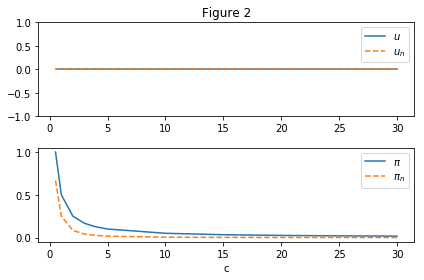

In [24]:
# a. plotting
fig = plt.figure()
fig, ax = plt.subplots(2, 1)

# b. upper graph with utility
ax[0].plot(c_vec, u_func, label = '$u$')
ax[0].plot(c_vec, u_func_new, label = '$u_n$', linestyle = 'dashed')
ax[0].legend(loc = 'upper right')
ax[0].set_ylim(-1, 1) # set y-axis to not confuse with the small variations in zero (python is not exactly 0) 
ax[0].set_title('Figure 2')

# c. lower graph with profits
ax[1].plot(c_vec, pi_func, label = '$\pi$')
ax[1].plot(c_vec, pi_func_new, label = '$\pi_n$', linestyle = 'dashed')
ax[1].legend(loc = 'upper right')
ax[1].set_xlabel('c')

# d. show
fig.tight_layout()
plt.show()

From figure 2 we see that A still gets a utility equal to his outside option independently of c. The lower plot shows that the profits is lower in the extended model than in the basic model. This happens when A is being risk-averse it is optimal for P to bear some of the risk of the stochastic term of the output $(b < 1)$. Also P needs to compensate A for the risk he puts on A. It would never be optimal for P to take all the risk himself as it would also remove all incentives to excert effort for A. Therefore we can say that there is a trade-off for P between insurance and incentive.